In [6]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 200)

df = pd.read_csv("retail_store_sales.csv", na_values="?")
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [2]:
# Initial diagnosis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [3]:
df.head()


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [4]:
df.describe(include='all')

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
count,12575,12575,12575,11362,11966.000000,11971.000000,11971.000000,12575,12575,12575,8376
unique,12575,25,8,200,NaN,NaN,NaN,3,2,1114,2
top,TXN_6867343,CUST_05,Furniture,Item_2_BEV,NaN,NaN,NaN,Cash,Online,2022-05-30,True
freq,1,544,1591,126,NaN,NaN,NaN,4310,6354,26,4219
mean,NaN,NaN,NaN,NaN,23.365912,5.536380,129.652577,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,10.743519,2.857883,94.750697,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5.000000,1.000000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,14.000000,3.000000,51.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,23.000000,6.000000,108.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,33.500000,8.000000,192.000000,NaN,NaN,NaN,NaN


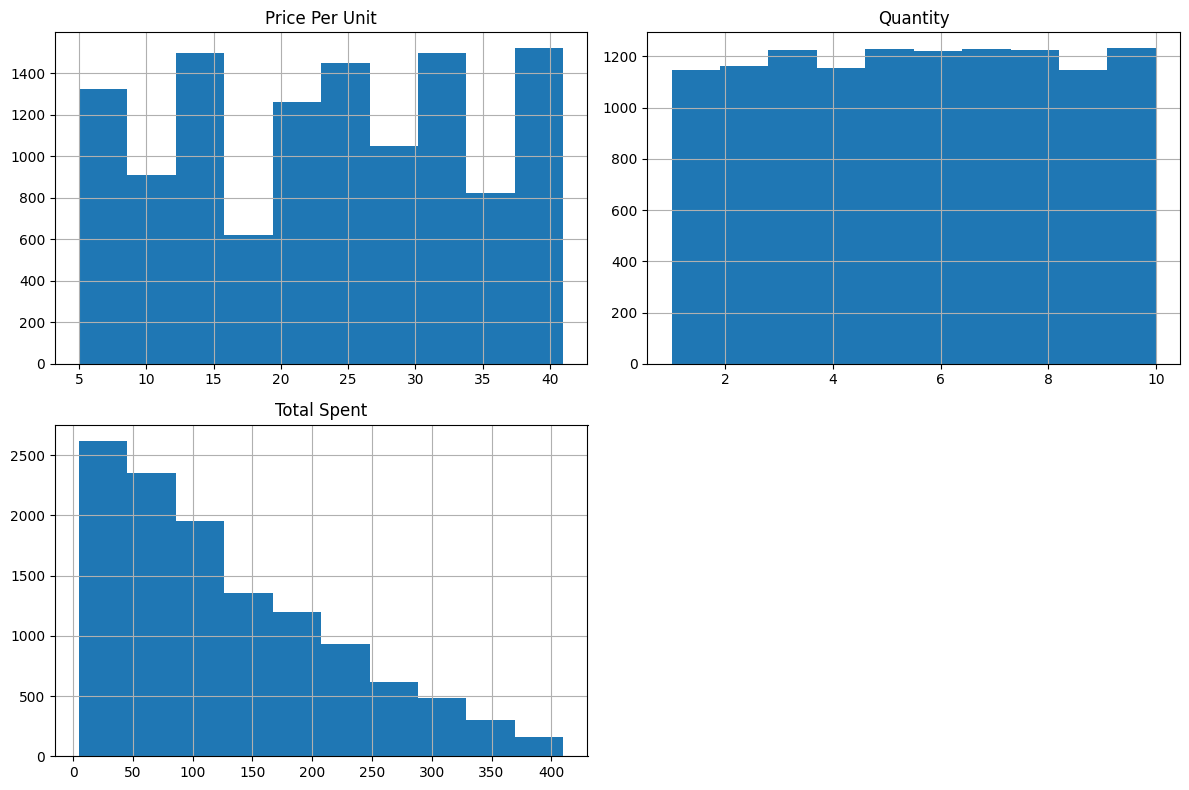

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

# Select all object-type categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,8150,8,7,7,18.5,10.0,185.0,2,1,828,1
1,3767,21,6,62,29.0,9.0,261.0,2,1,568,1
2,11597,1,1,17,21.5,2.0,43.0,1,1,277,0
3,11796,5,0,48,27.5,9.0,247.5,1,1,126,2
4,4999,4,4,172,12.5,7.0,87.5,2,1,274,0


In [9]:
# One-Hot Encoding for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,8150,8,7,7,18.5,10.0,185.0,2,1,828,1
1,3767,21,6,62,29.0,9.0,261.0,2,1,568,1
2,11597,1,1,17,21.5,2.0,43.0,1,1,277,0
3,11796,5,0,48,27.5,9.0,247.5,1,1,126,2
4,4999,4,4,172,12.5,7.0,87.5,2,1,274,0


In [10]:
# ONE-HOT ENCODING (for categorical columns)
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,8150,8,7,7,18.5,10.0,185.0,2,1,828,1
1,3767,21,6,62,29.0,9.0,261.0,2,1,568,1
2,11597,1,1,17,21.5,2.0,43.0,1,1,277,0
3,11796,5,0,48,27.5,9.0,247.5,1,1,126,2
4,4999,4,4,172,12.5,7.0,87.5,2,1,274,0


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Only numeric columns
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_encoded.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,0.513210,-0.562565,1.535328,-1.614646,-0.452935,1.561928,0.584162,1.235875,0.989479,0.829826,-0.004097
1,-0.694198,1.246067,1.097145,-0.732139,0.524439,1.212004,1.386300,1.235875,0.989479,0.031179,-0.004097
2,1.462774,-1.536444,-1.093765,-1.454190,-0.173685,-1.237464,-0.914571,0.016102,0.989479,-0.862693,-1.230854
3,1.517593,-0.979942,-1.531948,-0.956777,0.384814,1.212004,1.243815,0.016102,0.989479,-1.326523,1.222659
4,-0.354812,-1.119067,0.220781,1.032874,-1.011434,0.512156,-0.444897,1.235875,0.989479,-0.871908,-1.230854


In [12]:
df_encoded.to_csv("retail_processed.csv", index=False)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

df_scaled = df_encoded.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_scaled.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,0.513210,-0.562565,1.535328,-1.614646,-0.452935,1.561928,0.584162,1.235875,0.989479,0.829826,-0.004097
1,-0.694198,1.246067,1.097145,-0.732139,0.524439,1.212004,1.386300,1.235875,0.989479,0.031179,-0.004097
2,1.462774,-1.536444,-1.093765,-1.454190,-0.173685,-1.237464,-0.914571,0.016102,0.989479,-0.862693,-1.230854
3,1.517593,-0.979942,-1.531948,-0.956777,0.384814,1.212004,1.243815,0.016102,0.989479,-1.326523,1.222659
4,-0.354812,-1.119067,0.220781,1.032874,-1.011434,0.512156,-0.444897,1.235875,0.989479,-0.871908,-1.230854


In [14]:
df_scaled.to_csv("retail_processed_scaled.csv", index=False)